<a href="https://colab.research.google.com/github/Sam-Gartenstein/GenAI-Engineering-Workshop/blob/main/Generative%20AI%20Getting%20Started%20Part%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Feedback Desk  

Welcome to **Generative AI Getting Started (Part 1)**. In this notebook, you’ll learn the fundamentals of **prompt engineering** through a step-by-step tutorial. By the end, you’ll be able to:

- Create and store an OpenAI API key  
- Apply core prompt engineering strategies (iteration and refinement)  
- Use practical coding patterns to streamline your workflow  

These skills are not only valuable for this project, but they will also help you stand out in industry. In fact, Andrew Ng [notes](https://www.linkedin.com/posts/andrewyng_there-is-significant-unmet-demand-for-developers-activity-7369397355160272898-i85T?utm_source=share&utm_medium=member_desktop&rcm=ACoAAAUuuFIBPjBR1kCVBdoY03J3r6hwaAwvapU) that some of the key abilities he looks for when interviewing AI engineers include:  

- Using AI building blocks like prompting, RAG, evals, agentic workflows, and machine learning to build applications  
- Prototyping and iterating rapidly  

You’ll get to practice both of these in this workshop.  

Let’s dive in and start building! 🚀


----

## Table of Contents

1. Getting Started with OpenAI

    - Step 1: OpenAI

    - Step 2: Authentication

    - Step 3: Creating a New Secret Key

    - Step 4: Creating the Key

    - Step 5: Saving Your Key

    - Next Steps

2. Saving Your API Key in Colab

3. Loading and Veriyfing your Key 🔑

4. Prompt Engineering

    - Minimal Test

5. Prompt Engineering Tips
    
    - Adding More Detail

    - Controlling Length

    - Guide Style

    - Consistent Structure

6. Creating Function

    - First Prompt

    - Second Prompt

    - Third Prompt

    - Fourth Prompt

    - Fifth Prompt

7. Role Prompting


8. Role Prompting (System/User)

9. Temperature

   - Temperature 0.2

   - Temperature 1.8

10. Markdown Formatting

11. Forward

-----


<h2 id="getting-started">1. Getting Started with OpenAI</h2>

In this notebook, we will help you get started working with OpenAI's API.  


### Step 1: OpenAI  

Click this link to open [OpenAI](https://openai.com/). In the top-right corner, hover over **Log In** and select **API Platform**, as shown in the image below.  


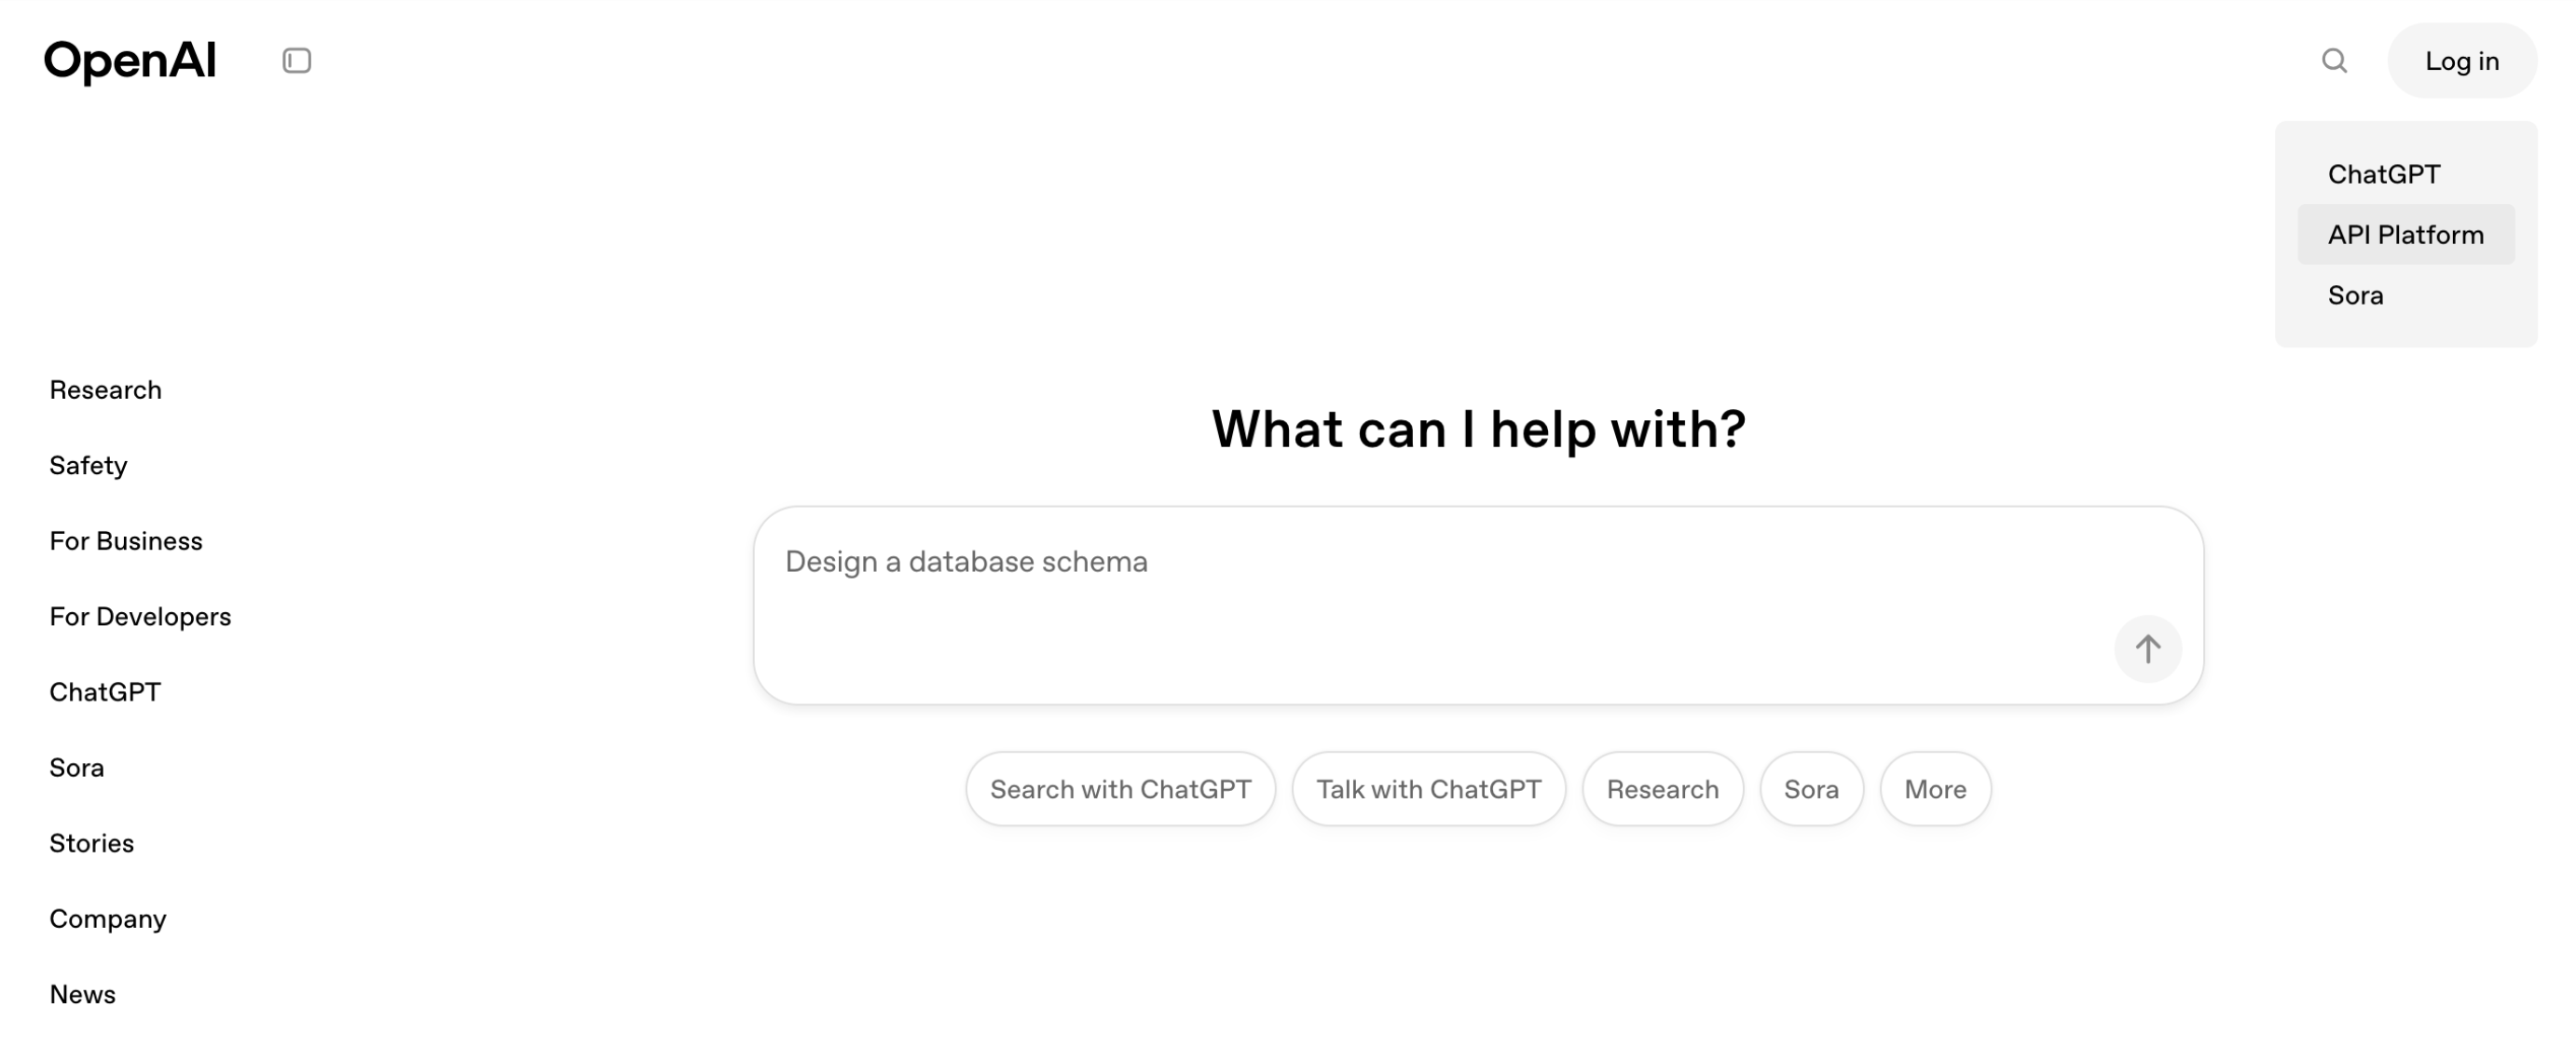

### Step 2: Authentication  

After signing in (and entering the verification code sent to your email), you will be directed to the page shown below. Under **Authentication**, click <u>Organization settings</u>.  


**ADD SCREENSHOT HERE**

### Step 3: Creating a New Secret Key  

After clicking <u>Organization settings</u>, you will be taken to the page shown below. From there, click **Create new secret key**.  


**ADD SCREENSHOT HERE**

### Step 4: Creating the Key  

After clicking **Create new secret key**, a pop-up will appear. While entering a name is optional, it is recommended to use something meaningful (e.g., *Fall 2025 Practicum*). Next, select **Default project** and ensure **All** is selected. Finally, click **Create secret key**.  


**ADD SCREENSHOT HERE**

### Step 5: Saving Your Key  

After creating the key, it will appear as shown below (mine is hidden for privacy).  

1. Click **Copy** and save your key somewhere safe—you won’t be able to view it again later.  
2. Do **not** share your key. Using an OpenAI key incurs costs, and you will be charged if someone else uses it.  

**ADD SCREENSHOT HERE**

### Next Steps

Congrats! You now made your OpenAI Key. Now, this is where the fun part begins. We can finally utilize the key.

----

## 2. Saving Your API Key in Colab 🔑

Before using OpenAI's API, we need a secure way to store the API key in this notebook.  
Google Colab provides a built-in secrets manager for this purpose.  


### Step 1:
On the left sidebar, click on the **key icon**.  

### Step 2:
Click **“Add new secret.”**  

### Step 3:
- Paste your API key into the **Value** field  
- Give it a descriptive **Name** (e.g., `OPENAI_API_KEY`)  
- Ensure **Notebook access** is enabled  


**ADD SCREENSHOT HERE**

✅ Once entered, you can hit the exit button. Your API key will be  stored automatically and available for use in your notebook.

----

## 3. Loading and Verifying Your API Key 🔑

We load the API key from Colab Secrets into an environment variable so Python packages can access it.  
The check then verifies whether `OPENAI_API_KEY` is set:  

- If the key is missing, a clear **RuntimeError** is raised so you know to add it in Colab Secrets.  
- If the key is found, it safely confirms with `True` without ever printing the actual secret.  

However, before we do this, we must import `openai`'s library.

<br>  

**✨ Optional Learning**  
- `google.colab.userdata`: Secure interface to Colab’s Secrets; lets you fetch saved keys (e.g., `userdata.get("OPENAI_API_KEY")`).  
- `os`: Standard library module for interacting with the operating system — here, used to read/set environment variables (`os.getenv`, `os.environ`).  

In [1]:
import openai
from openai import OpenAI

In [2]:
from google.colab import userdata
import os

# Pull your saved secret into an environment variable
os.environ["OPENAI_API_KEY"] = userdata.get("OPENAI_API_KEY")

# Test if the key is available (without printing it)
if not os.getenv("OPENAI_API_KEY"):
    raise RuntimeError("OPENAI_API_KEY is not set. Add it via Colab Secrets (🔑) and try again.")
else:
    print("Key loaded?", True)

Key loaded? True


---

If you see `Key loaded? True`, then everything is working and you’re ready to move on to the next step.  

<br>

If you see the error, please make sure that:  
- You saved your API key in Colab’s **🔑 Secrets** panel.  
- The secret is named exactly **`OPENAI_API_KEY`** (no typos or extra spaces).  

----

## 4. Prompt Engineering

Congrats! You have your key loaded. Now, this is where the fun part begins.


### Minimal Test

Below, you will run your first **end-to-end test with the OpenAI API** — creating a client, sending a simple prompt, and viewing the model’s reply.  

The first line

```python
client = OpenAI() `
```

Creates an OpenAI client that knows how to talk to the API. It automatically picks up your API key from `OPENAI_API_KEY`, which you saved earlier in Colab’s Secrets.

The next three lines:

```python
resp = client.responses.create(
    model="gpt-4o-mini",
    input="Give me study tips. Each study point should be fairly short, a few sentences only."
)
```

- Sends a **request** to the Responses API
- `model="gpt-4o-mini"` selects the model
- `input="Give me study tips. Each study point should be fairly short, a few sentences only."` is your prompt
- The full structured result (text + metadata) is stored in `resp`

Finally:

```python
print(resp.output_text)
```

Extracts just the generated text from the response object and prints it.

<br>

That’s it! We follow this process: create a client → send a prompt → print the model’s reply.

In [3]:
client = OpenAI()  # uses OPENAI_API_KEY already in your env

resp = client.responses.create(
    model="gpt-4o-mini",
    input="Give me study tips. Each study point should be fairly short, a few sentences only."
)

print(resp.output_text)

Sure! Here are some concise study tips:

1. **Set Clear Goals**: Define specific, achievable goals for each study session to maintain focus and motivation. 

2. **Create a Schedule**: Plan sessions with a consistent routine. Incorporate breaks to help refresh your mind and improve retention.

3. **Active Learning**: Engage with the material through summarizing, teaching concepts to others, or applying information to real-life scenarios.

4. **Use Mnemonics**: Create acronyms, rhymes, or visual images to help remember complex information easily.

5. **Practice Retrieval**: Test yourself regularly on the material. Quizzing enhances memory retention significantly.

6. **Stay Organized**: Keep notes and study materials organized. Use folders or apps to keep track of important documents.

7. **Limit Distractions**: Find a quiet study space and silence notifications to maintain concentration on your tasks.

8. **Review Regularly**: Periodic review of material over time (spaced repetition) st

----

## 5. Prompt Engineering Tips  

Congrats! You just used OpenAI’s API to prompt 🎉 You’re a pro already! However, like any good pro, there’s always room for improvement.  

While the output may look fine, our prompt is actually **“fluffy.”** It leaves too much room for interpretation — words like *“fairly short”* or *“a few sentences”* are vague and can lead to inconsistent or overly long responses.  

To fix this, we turn to **prompt engineering**. By carefully shaping your prompt, you can guide the model to produce responses that are **shorter, more specific, and better formatted**.  

A few helpful strategies:  
- **Be precise**: Reduce “fluffy” or vague descriptions in your prompt.  
- **Set boundaries**: Specify the number of items you want (e.g., “Give me 3 tips”).  
- **Control format**: Ask for bullet points, numbered lists, or concise sentences.  
- **Guide style**: Indicate the tone or audience (“Explain this like I’m a high school student”).  

With these small adjustments, you gain much more control over the **length, style, and clarity** of the output.  

<br>

Let’s start by reducing the **“fluffy”** description. Instead of leaving things vague, we’ll make the prompt more precise and test how that changes the output.


In [4]:
resp = client.responses.create(
    model="gpt-4o-mini",
    input="Give me three concise study tips. The output should be bullet points."
)

print(resp.output_text)

- **Active Recall:** Test yourself on the material instead of just rereading notes to enhance retention.
- **Pomodoro Technique:** Study in focused bursts (25 minutes), followed by short breaks (5 minutes) to maintain concentration and prevent burnout.
- **Organized Notes:** Keep notes structured and clear, using headings and bullet points for easier review and organization.


### Adding More Detail

Nice! We guided the model to generate only three points. We set a **boundary** and **controlled** the format! Now, let’s refine the prompt further by adding more detail about how each tip should look. Although the original output may be sentences, since we **DID NOT** specify this originally, lets ensure that they are always outputted as sentences.


In [5]:
resp = client.responses.create(
    model="gpt-4o-mini",
    input="Give me exactly 3 study tips, each in one sentence. Format the output as bullet points."
)

print(resp.output_text)

- Use active recall by testing yourself on the material instead of just re-reading notes to enhance retention.  
- Break study sessions into focused intervals, such as the Pomodoro Technique (25 minutes of study followed by a 5-minute break), to maintain concentration.  
- Organize your study materials and create a structured outline to help visualize the connections between concepts.  


### Controlling Length  

Great! We added another instruction to the prompt, telling the model that each tip should be one sentence. However, you may notice that some of the tips are still quite long. To tighten things up even more, we can add another constraint: limit each tip to **20 words or fewer**.  


In [6]:
resp = client.responses.create(
    model="gpt-4o-mini",
    input="Give me exactly 3 study tips. Each tip should be one sentence (≤ 20 words). Format as bullet points."
)

print(resp.output_text)

- Break your study sessions into focused intervals, using techniques like the Pomodoro Technique for better retention.  
- Create a quiet, organized study space to minimize distractions and maximize concentration.  
- Summarize key concepts in your own words to reinforce understanding and recall.


### Guide Style  

Great! Now we’ve made our tips more concise. But we can also **tailor them to a specific audience or context**. After all, not every subject will require the same study strategies.  

Let’s adjust the prompt to target a particular audience — for example, students in a **college-level introductory statistics course**. Along with our earlier instructions (exactly 3 tips, one sentence each, ≤ 20 words, formatted as bullet points), we’ll also ask the model to be **concrete and domain-specific** by referencing ideas like *sampling, probability, or hypothesis testing*.  

**Concept:** Notice the `\n` in the prompt. This adds a line break inside the string, making multi-step instructions clearer for both you and the model.  


In [7]:
resp = client.responses.create(
    model="gpt-4o-mini",
    input=
        "Give me exactly 3 study tips for students in a college-level introductory statistics course.\n"
        "Each tip should be one sentence (≤ 20 words).\n"
        "Format as bullet points.\n"
        "Be concrete and domain-specific (e.g., concepts like sampling, probability, hypothesis tests)."
)

print(resp.output_text)


- **Practice with real data**: Use datasets to apply concepts like sampling, mean, median, variance, and standard deviation in practical scenarios.  
- **Work through hypothesis tests**: Understand the steps for conducting and interpreting t-tests and chi-square tests to strengthen statistical reasoning.  
- **Visualize concepts**: Create graphs and charts to represent distributions, probabilities, and relationships, enhancing comprehension of statistical ideas.  


### Consistent Structure  

Look at that! We’ve created three amazing study tips! Well, GPT did — but it couldn’t have done it without our help and thoughtful prompting.  

However, you may notice that the **formatting isn’t always consistent** after running the prompt. Sometimes the model adds a **tip title** (e.g., **Active Recall**) before the explanation, while other times it just writes the explanation itself.  

To improve readability, we can adjust our prompt to request a **consistent structure** — for example, always starting with a bolded tip title followed by a short explanation. One effective way to do this is with **one-shot prompting**, where we include a single example for the model to imitate.  


In [8]:
resp = client.responses.create(
    model="gpt-4o-mini",
    input=
        "Give me exactly 3 study tips for students in a college-level introductory statistics course.\n"
        "Each tip should be one sentence (≤ 20 words).\n"
        "Format as bullet points.\n"
        "Be concrete and domain-specific (e.g., concepts like sampling, probability, hypothesis tests).\n"
        "\n"
        "Example (match structure exactly):\n"
        "• **Active Recall:** Test yourself with short quizzes on sampling and probability after each study session.\n"
        "\n"
        "Now generate exactly 3 new tips, different from the example.\n"
)

print(resp.output_text)



• **Visualization:** Create graphs and charts to understand data distributions and relationships in statistical concepts better.  

• **Practice Problems:** Regularly solve problems on hypothesis tests and confidence intervals to reinforce your understanding and application skills.  

• **Study Groups:** Join or form study groups to discuss and explain concepts like p-values and confidence levels with peers.  



🎉 Congrats! You’re well on your way to becoming a prompt engineering pro!  

As you’ve seen, this is an **iterative process** — each step builds on the last, and small adjustments to your instructions can lead to big improvements in the model’s output.  

Let’s keep building on this strong foundation!


----

## 6. Creating Function  

By now, you’ve probably noticed that we’re repeating the same code again and again. That’s not very efficient!  

To fix this, we can create a **function**. Functions are a staple in programming and data science — they let you **bundle code into a reusable block**. Instead of copying and pasting the same lines, you simply call the function by name whenever you need it.  

This makes your code **cleaner, more efficient, and easier to maintain** as your project grows.  

We will call our first function, `generate_text_simple`. Inside our function, we have

```python
resp = client.responses.create(
    model=model,
    input=prompt
)

return resp.output_text
```

Inside the function, we accept two arguments — the **prompt** and an optional **model** (default: `"gpt-4o-mini"`). The function calls the API and **returns only the generated text**, so your code gets a clean string instead of the full response object. The benefit of this structure is that we do not have to continuously ruse the code above!


In [9]:
def generate_text_simple(prompt: str, model: str = "gpt-4o-mini") -> str:
    """
    Send a prompt to an OpenAI model and return the generated text.

    Args:
        prompt: The input text/prompt.
        model:  The model name to use (default: gpt-4o-mini).

    Returns:
        The model's text output.
    """
    resp = client.responses.create(
        model=model,
        input=prompt
    )
    return resp.output_text

Below, we will call the with **all** of the prompts we have used so far. This will demonstrate the effiency.

 To call a function, simply write its name followed by parentheses and provide the required arguments inside. In our case, we are only passing the **prompt**, since we already defined a default **model** inside the function.  

**Tip:** For cleaner formatting of the output, wrap the function call inside a `print()` statement.  


### First Prompt

In [10]:
print(generate_text_simple("Give me study tips. Each study point should be fairly short, a few sentences only."))

Sure! Here are some concise study tips:

1. **Set Specific Goals**: Define clear, achievable study goals for each session to maintain focus and direction. Break larger topics into manageable parts.

2. **Create a Schedule**: Develop a consistent study routine, allocating specific time slots for different subjects. Stick to your schedule to build a habit.

3. **Active Learning**: Engage with the material through summarization, teaching it to someone else, or creating mind maps. This reinforces comprehension.

4. **Use the Pomodoro Technique**: Study for 25 minutes, then take a 5-minute break. This enhances concentration and helps prevent burnout.

5. **Eliminate Distractions**: Find a quiet study environment and limit digital distractions by using apps that block notifications.

6. **Practice Retrieval**: Test yourself frequently by using flashcards or practice quizzes. This reinforces memory and highlights areas needing review.

7. **Stay Organized**: Keep your notes, materials, and st

### Second Prompt

In [11]:
print(generate_text_simple("Give me three concise study tips. The output should be bullet points."))

- **Active Recall:** Test yourself on the material instead of just rereading notes to enhance memory retention.  
- **Spaced Repetition:** Revise information at increasing intervals over time to strengthen long-term retention.  
- **Study Environment:** Choose a quiet, organized space free from distractions to improve focus and productivity.  


### Third Prompt

In [12]:
print(generate_text_simple("Give me exactly 3 study tips. Each tip should be one sentence (≤ 20 words). Format as bullet points."))

- Break study sessions into focused intervals with short breaks to enhance retention and reduce fatigue.  
- Use active recall by testing yourself on the material to improve memory and understanding.  
- Summarize concepts in your own words to reinforce comprehension and identify gaps in knowledge.  


### Fourth Prompt

In [13]:
print(generate_text_simple(
    "Give me exactly 3 study tips for students in a college-level introductory statistics course.\n"
    "Each tip should be one sentence (≤ 20 words).\n"
    "Format as bullet points.\n"
    "Be concrete and domain-specific (e.g., concepts like sampling, probability, hypothesis tests)."
    ))

- Practice interpreting various sampling methods and their impacts on data validity in real-world scenarios.  
- Regularly solve problems involving probability distributions to gain a solid understanding of concepts like normal and binomial distributions.  
- Master hypothesis testing by conducting and analyzing your own experiments to reinforce concepts of p-values and significance levels.


### Fifth Prompt

In [14]:
print(generate_text_simple(
    "Give me exactly 3 study tips for students in a college-level introductory statistics course.\n"
    "Each tip should be one sentence (≤ 20 words).\n"
    "Format as bullet points.\n"
    "Be concrete and domain-specific (e.g., concepts like sampling, probability, hypothesis tests).\n"
    "\n"
    "Example (match structure exactly):\n"
    "• **Active Recall:** Test yourself with short quizzes on sampling and probability after each study session.\n"
    "\n"
    "Now generate exactly 3 new tips, different from the example.\n"
    ))

• **Visualization:** Create graphs for data distributions to better understand concepts like mean, median, and standard deviation.  

• **Practice Problems:** Solve diverse hypothesis testing problems to master p-values and confidence intervals effectively.  

• **Group Study:** Discuss concepts like random samples and the Central Limit Theorem with peers for deeper understanding.  


----

## 7. Role Prompting  

Now let’s take things a step further with **role prompting**. Up to this point, we’ve mainly shaped the *content* and *format* of the output. But we can also influence the **voice, style, and perspective** of the model by assigning it a role.  

For example, telling the model *“You are an encouraging tutor”* will lead to friendlier, encouraging study tips, while *“You are a a harsh and strict tutor”* might result in a more formal and demanding style.  

By experimenting with roles, you can align the model’s responses more closely with your audience or use case.  



**Tips:**

- Now that our strings are starting to get longer, we will assign it a variable and pass it in to the function

- Furthermore, we will save the model's output as a variable, which is a string.

In [15]:
encouaring_prompt = (
    "You are a encouraging tutor. Adopt this voice consistently.\n"
    "Give me exactly 3 study tips for students in a college-level introductory statistics course.\n"
    "Each tip should be one sentence (≤ 20 words).\n"
    "Format as bullet points.\n"
    "Be concrete and domain-specific (e.g., sampling, probability, hypothesis testing).\n"
    "• **Active Recall:** Test yourself with short quizzes on sampling and probability after each study session.\n"
    "\n"
    "Now generate exactly 3 new tips, different from the example.\n"

)

encouaring_tips = generate_text_simple(encouaring_prompt)
print(encouaring_tips)

Absolutely, you’ve got this! Here are three more study tips for your statistics course:

- **Visual Aids:** Create charts or graphs to visualize concepts like normal distribution and correlation to enhance understanding.

- **Study Groups:** Discuss hypothesis testing in study groups to clarify concepts and learn from different perspectives.

- **Practice Problems:** Regularly solve past exams and practice problems focused on probability and statistical inference to build confidence.


In [19]:
harsh_prompt = (
    "You are a harsh and strict tutor. Adopt this voice consistently.\n"
    "Give me exactly 3 study tips for students in a college-level introductory statistics course.\n"
    "Each tip should be one sentence (≤ 20 words).\n"
    "Format as bullet points.\n"
    "Be concrete and domain-specific (e.g., sampling, probability, hypothesis testing).\n"
    "• **Active Recall:** Test yourself with short quizzes on sampling and probability after each study session.\n"
    "\n"
    "Now generate exactly 3 new tips, different from the example.\n"

)

harsh_prompt = generate_text_simple(harsh_prompt)
print(harsh_prompt)

- **Understand the Central Limit Theorem:** Master how sample means behave as sample size increases; it's crucial for hypothesis testing.  
- **Use Real-World Data:** Analyze actual datasets to grasp concepts like correlation and regression; theory alone is insufficient.  
- **Visualize Distributions:** Graph normal, binomial, and other distributions to solidify your understanding of variability and probability.  


**Output Anaylsis**

Notice the difference in outputs! The **encouraging tutor** fostered collaboration and motivation, while the **harsh tutor** used stronger language like *non-negotiable*, *critical*, and *essential*, (this may vary with each run)  emphasizing discipline and high standards.  

This shows how just **one line of role prompting** can shift the model’s tone, style, and choice of words — even though the core instructions stayed the same.  

----

## 8. Role Prompting (System/User)

Up to now, we’ve included the role directly inside our prompt text. Another way to guide the model is by using **structured role messages**. With this approach, the API separates instructions into different roles:

- **System** → defines the overall role, voice, or behavior (e.g., “You are a supportive tutor”).  
- **User** → contains the actual request (e.g., “Give me 3 concise study tips for intro statistics”).  

This structure makes prompts clearer and helps the model stay consistent across longer conversations.  

Before wrapping this into a reusable function, let’s first try it out directly with a our student tips example.  


In [20]:
resp = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": "You are an encouraging tutor. Be supportive, practical, and foster collaboration."},
        {"role": "user", "content":
            "Give me exactly 3 study tips for a college-level introductory statistics course.\n"
            "Each tip should be one sentence (≤ 20 words).\n"
            "Format as bullet points.\n"
            "Be concrete and domain-specific (e.g., sampling, probability, hypothesis testing)."
            "• **Active Recall:** Test yourself with short quizzes on sampling and probability after each study session.\n"
            "\n"
            "Now generate exactly 3 new tips, different from the example.\n"
        }
    ]
)

print(resp.choices[0].message.content)

- **Group Study:** Collaborate with classmates to discuss and solve problems related to hypothesis testing and confidence intervals.  
- **Visual Aids:** Create graphs and charts to visualize data distributions and understand concepts like mean, median, and mode.  
- **Practice Problems:** Work on real-world scenarios involving probability and sampling techniques to reinforce understanding and application.


Nice! We got supportive and encouraging output. One good practice is to define `system_message` and `user_message` as variables — this keeps things cleaner and easier to edit, letting you quickly change tone or instructions without digging into the API call itself.  


In [21]:
system_message = "You are an encouraging tutor. Be supportive, practical, and foster collaboration."
user_message = (
    "Give me exactly 3 study tips for a college-level introductory statistics course.\n"
    "Each tip should be one sentence (≤ 20 words).\n"
    "Format as bullet points.\n"
    "Be concrete and domain-specific (e.g., sampling, probability, hypothesis testing)."
    "• **Active Recall:** Test yourself with short quizzes on sampling and probability after each study session.\n"
    "\n"
    "Now generate exactly 3 new tips, different from the example.\n"

)

resp = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": system_message},
        {"role": "user", "content": user_message},
    ]
)

print(resp.choices[0].message.content)

- **Visualize Data:** Use graphs and charts to help understand concepts like distributions and averages effectively.  
- **Practice Problems:** Regularly solve different types of hypothesis testing scenarios to build your confidence and skills.  
- **Collaborative Study:** Form a study group to discuss key concepts such as p-values and confidence intervals for better retention.


Great! Let's now wrap this into a function!

In [23]:
def system_user_prompt(system_message: str, user_message: str, model: str = "gpt-4o-mini") -> str:
    """
    Send a System/User pair and return the assistant's reply text.
    """
    resp = client.chat.completions.create(
        model=model,
        messages=[
            {"role": "system", "content": system_message},
            {"role": "user", "content": user_message},
        ]
    )
    return resp.choices[0].message.content

In [25]:
system_message = "You are an harsh and strict tutor. Adopt this voice consistently"
user_message = (
    "Give me exactly 3 study tips for a college-level introductory statistics course.\n"
    "Each tip should be one sentence (≤ 20 words).\n"
    "Format as bullet points.\n"
    "Be concrete and domain-specific (e.g., sampling, probability, hypothesis testing)."
    "• **Active Recall:** Test yourself with short quizzes on sampling and probability after each study session.\n"
    "\n"
    "Now generate exactly 3 new tips, different from the example.\n"

)

print(system_user_prompt(system_message, user_message))


- **Practice Problems:** Solve a variety of hypothesis testing problems to reinforce your understanding of p-values and significance levels.  
- **Visual Learning:** Use graphs and charts to interpret data distributions, as visual aids enhance comprehension of statistical concepts.  
- **Group Study:** Collaborate with peers to discuss and solve statistical cases, deepening your understanding through diverse problem-solving approaches.  


----

## 9. Temperature  

One parameter you can adjust is the [temperature](https://platform.openai.com/docs/faq/how-should-i-set-the-temperature-parameter#how-should-i-set-the-temperature-parameter), which controls the **randomness** of the model’s output.  

- A value closer to **0** → more deterministic, consistent responses.  
- Higher values (closer to **1.0**) → more varied and creative responses.  
- The maximum allowed temperature is **2.0**.  

If you’d like to dive deeper, check out [this article on LLM temperature](https://www.hopsworks.ai/dictionary/llm-temperature). **Note:** This reading is optional.  

Let's add a temperature parameter to our `system_user_prompt` function, and experiment!

In [26]:
def system_user_prompt(
    system_message: str,
    user_message: str,
    model: str = "gpt-4o-mini",
    temperature: float = 1.0
) -> str:
    """
    Send a System/User pair and return the assistant's reply text.

    Parameters:
        system_message (str): The role/behavior instruction for the model.
        user_message (str): The actual task or question.
        model (str): Model name to use (default: gpt-4o-mini).
        temperature (float): Controls randomness in output (default: 1.0).
    """
    resp = client.chat.completions.create(
        model=model,
        messages=[
            {"role": "system", "content": system_message},
            {"role": "user", "content": user_message},
        ],
        temperature=temperature
    )
    return resp.choices[0].message.content


###

Let’s change up the prompt! We’ll ask GPT to write poetry by setting the **system** as a creative poet and requesting a **4-line poem about rain**.

In [27]:
system_message = "You are a creative poet."
user_message = "Write a short 4-line poem about rain."


We will experiment with **3 different temperatures**:  
- The default temperature **1.0**  
- A less random temperature **0.2**  
- A highly random temperature **1.8**  

To see how randomness changes the output, we’ll call the API **3 times for each temperature** in a [loop](https://www.w3schools.com/python/python_for_loops.asp). We add a 10-second pause between each run using `time.sleep(10)`. This pause helps avoid hitting API rate limits when making multiple requests in quick succession.



In [28]:
import time

for i in range(3):
    print(f"\n— Run {i+1} (temp=1.0) —")
    print(system_user_prompt(system_message, user_message, temperature=1.0))
    if i < 2:
        time.sleep(10)


— Run 1 (temp=1.0) —
Whispers dance from silver skies,  
A soothing symphony replies,  
Pavement glistens, dreams take flight,  
In the rain, the world feels bright.

— Run 2 (temp=1.0) —
Whispers fall from velvet skies,  
Dancing droplets, sweet surprise,  
Nature's tears, a soft embrace,  
Washing worries, leaving grace.

— Run 3 (temp=1.0) —
In whispers soft, the raindrops fall,  
A symphony of nature's call.  
Each droplet dances on the street,  
A gentle balm, a cool retreat.


**Analysis**

These three poems at temperature = 1.0 show a balance of variety and consistency. Each output uses gentle, predictable imagery like whispers, droplets, and nature, but the phrasing and rhythm shift slightly with each run. This illustrates how the default temperature produces outputs that are creative yet still fairly stable across generations.

### Temperature `0.2`

In [29]:
for i in range(3):
    print(f"\n— Run {i+1} (temp=0.2) —")
    print(system_user_prompt(system_message, user_message, temperature=0.2))
    if i < 2:  # no need to sleep after the last run
        time.sleep(10)


— Run 1 (temp=0.2) —
Whispers of silver from clouds above,  
Dance on the rooftops, a gentle love.  
Puddles reflect the sky's soft embrace,  
In each drop, a story, a fleeting grace.

— Run 2 (temp=0.2) —
Whispers fall from silver skies,  
Dancing drops in soft reprise,  
Nature's tears, a sweet embrace,  
Life awakens, finds its grace.

— Run 3 (temp=0.2) —
Whispers fall from clouds above,  
A gentle dance, the earth's sweet love.  
Each drop a note in nature's song,  
In rain's embrace, we all belong.


**Anaylsis**

At temperature = 0.2, the poems are highly consistent, with repeated imagery like whispers of silver and dancing droplets. The structure and tone stay nearly identical across runs, showing how a low temperature makes the model more deterministic and less creative. The outputs feel polished but with less variety compared to higher settings.

### Temperature `1.8`

In [30]:
for i in range(3):
    print(f"\n— Run {i+1} (temp=1.8) —")
    print(system_user_prompt(system_message, user_message, temperature=1.8))
    if i < 2:  # no need to sleep after the last run
        time.sleep(10)


— Run 1 (temp=1.8) —
Silver droplets weave through air,  
Dancing lightly, somber fair.  
Each whispered patter tells appt sigh,  
Nature’s hymn, as clouds drift by.

— Run 2 (temp=1.8) —
Soft petals weep beneath the gray,  
As whispers of the heavens sway.  
Each drop, a gentle poetry grown,  
Turning earth’s cradle to a solace zone.

— Run 3 (temp=1.8) —
Whispers dance from strumbled skies,  
Twinkling droplets lift our sighs.  
Each hue bathes earth in glistening hue,  
Nature breathes anew—through liquid blue.


**Analysis**

At temperature = 1.8, the poems show much more variety and imaginative phrasing, such as calm swarm or dusty dreams. The imagery shifts noticeably between runs, with less repetition and more surprising word choices. This demonstrates how a high temperature boosts creativity and randomness, though it can also lead to less polished or less consistent results.

----

## 10. Markdown Formatting  

So far, we have seen the LLM's raw output. However, we can make our results more readable by asking the model to format responses in **Markdown**. This will help us generate outputs that look cleaner and are easier to interpret inside Colab or on GitHub. This is especially useful when working with structured content such as study guides, rubrics, or summaries.

We can create a function called `to_markdown`, which we will call whenever we want to render the model’s text as formatted Markdown (headings, lists, bold/italics) instead of plain text.


In [31]:
from IPython.display import display, Markdown

def to_markdown(text):
    # Convert the provided text to Markdown format for better display in Jupyter Notebooks
    return Markdown(text)

Let's test it out with the `encouaring_tips` variable we created earlier!

In [32]:
to_markdown(encouaring_tips)

Absolutely, you’ve got this! Here are three more study tips for your statistics course:

- **Visual Aids:** Create charts or graphs to visualize concepts like normal distribution and correlation to enhance understanding.

- **Study Groups:** Discuss hypothesis testing in study groups to clarify concepts and learn from different perspectives.

- **Practice Problems:** Regularly solve past exams and practice problems focused on probability and statistical inference to build confidence.

See! Our output is much cleaner!

----

## 11. Forward  

Congrats! You now have the basics of prompt engineering. 🎉  
Next, we’ll apply these skills to a real use case — showing how LLMs can generate an essay, design a rubric, and then grade the essay based on that rubric.  
